In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
df = pd.read_csv("/Users/parth/Desktop/FeynnLabs/PROJECT_RESEARCH_2/mcdonalds.csv") 

In [2]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [4]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [5]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


<AxesSubplot:>

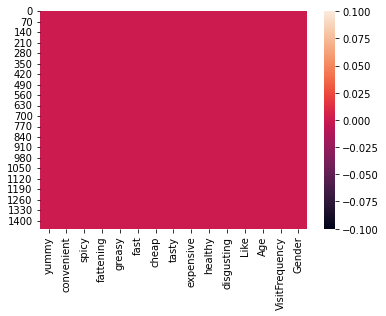

In [7]:
sns.heatmap(df.isnull()) # checking for null values in our dataset

In [8]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [9]:
data=df.iloc[:,1:11]
data.head()

,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [10]:
# printing max and min age of the customer
print(df['Age'].max())
print(df['Age'].min())

71
18


In [11]:
# checking the number of male and female who visits the shop
print(df['Gender'].value_counts())
arr = df['Gender'].value_counts()


Female    788
Male      665
Name: Gender, dtype: int64


<AxesSubplot:>

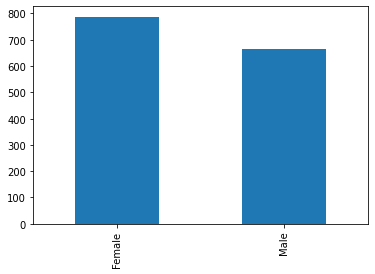

In [12]:
df['Gender'].value_counts().plot(kind='bar')   # here female count is more than male count

In [13]:
# checking the count of healthy and non healthy food   ( here yes represents healthy foood)
healthy_nonhealthy=df['healthy'].value_counts()
healthy_nonhealthy

No     1164
Yes     289
Name: healthy, dtype: int64

In [14]:
# Encoding technique
# we had only one numerical feature in our dataset
df.replace({'tasty':{'Yes':1,'No':0}},inplace=True)
df.replace({'expensive':{'Yes':1,'No':0}},inplace=True)
df.replace({'healthy':{'Yes':1,'No':0}},inplace=True)
df.replace({'disgusting':{'Yes':1,'No':0}},inplace=True)
df.replace({'Like':{'I love it!+5':1,'I hate it!-5':2}},inplace=True)
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
df.replace({'yummy':{'Yes':1,'No':0}},inplace=True)
df.replace({'convenient':{'Yes':1,'No':0}},inplace=True)
df.replace({'spicy':{'Yes':1,'No':0}},inplace=True)
df.replace({'fattening':{'Yes':1,'No':0}},inplace=True)
df.replace({'greasy':{'Yes':1,'No':0}},inplace=True)
df.replace({'fast':{'Yes':1,'No':0}},inplace=True)
df.replace({'cheap':{'Yes':1,'No':0}},inplace=True)
df.replace({'VisitFrequency':{'Every three months':1,'Never':0,'Once a month':2,'Once a year':3,'More than once a week':4,'Once a week':5}},inplace=True)


In [15]:
#lets print our dataset again
df.head()  # returns the top 5 rows of the datset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,1,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,1,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,5,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,2,1


<AxesSubplot:>

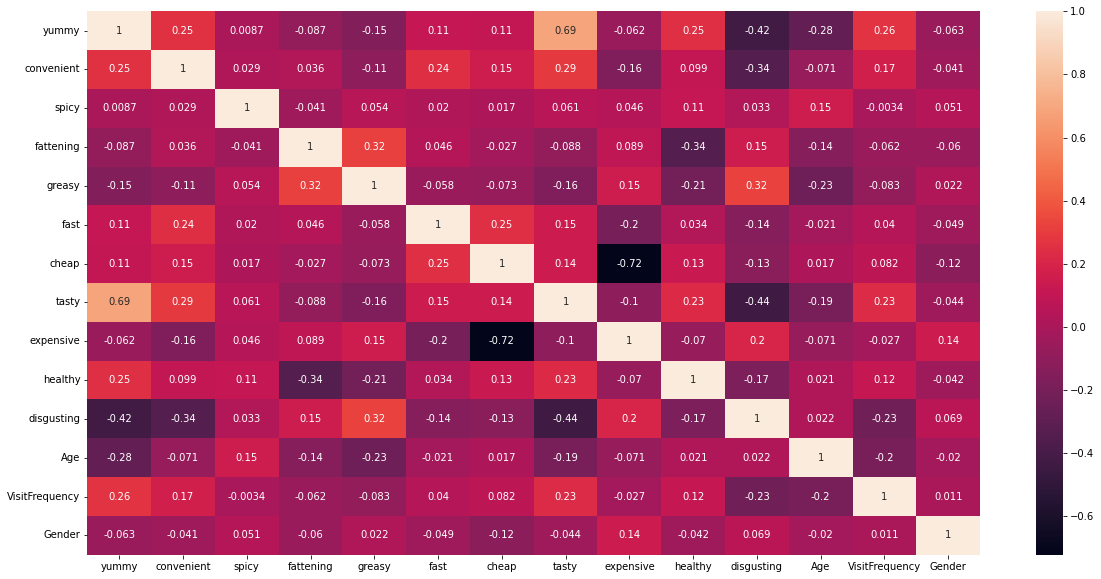

In [16]:
# Checking the correlation of the dataset
correlation=df.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(correlation,annot=True)

# K-Means

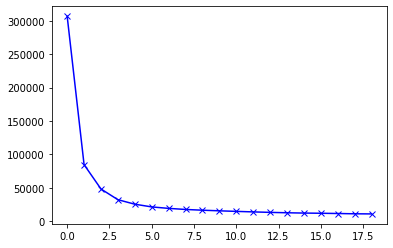

In [17]:
# kmeans algorithm
# elbow method (how many clusters u should have)
# elbow method graph ( for selecting the no of clusters )
from sklearn.cluster import KMeans
scores=[]
range_values=range(1,20)
for i in range_values:
  kmean = KMeans(n_clusters=i)
  kmean.fit(df)
  scores.append(kmean.inertia_)

plt.plot(scores,'bx-')

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(df)
label=kmeans.labels_


In [19]:
kmeans.cluster_centers_.shape

(3, 15)

In [20]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])    # creating a dataframe
cluster_centers

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.424132,0.890311,0.140768,0.819013,0.425960,0.914077,0.628885,0.561243,0.294333,0.202925,0.243144,0.749543,59.691042,1.957952,0.433272
1,0.751121,0.926009,0.051570,0.914798,0.692825,0.912556,0.625561,0.771300,0.365471,0.188341,0.219731,1.571749,27.331839,2.697309,0.461883
2,0.513043,0.910870,0.078261,0.878261,0.484783,0.871739,0.536957,0.619565,0.426087,0.204348,0.265217,1.108696,43.413043,2.376087,0.482609


In [21]:
# so now we have 3 group of customer
label.shape  # label will be assigned to our dataset(0-3)
(1453,)
# how the labels are assigned
L=kmeans.fit_predict(df) # use scaled data here
L

array([1, 2, 1, ..., 1, 2, 0], dtype=int32)

In [22]:
# here we are going to add the label to the original data(that is grouping(0-7))
final_data=pd.concat([df,pd.DataFrame({"cluster":label})],axis=1)
final_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,1,0,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,5,0,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,2,47,3,1,2
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,5,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,2,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,1,1,2


In [23]:
# checkig the count of customer in each cluster
final_data['cluster'].value_counts()


0    547
2    460
1    446
Name: cluster, dtype: int64

In [24]:
# principal component analysis  ( this is used to reduce the dimentionality)
# dimentionality reduction
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(final_data)
pca_dataframe=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_dataframe

,pca1,pca2
0,-16.536175,3.872855
1,-6.352080,-0.866155
2,-17.435612,-0.085852
3,-24.268771,-3.902616
4,-4.351941,-0.817373
...,...,...
1448,-2.330602,-0.791649
1449,8.704878,-1.256194
1450,-7.375731,-2.066779
1451,3.667746,-2.667732


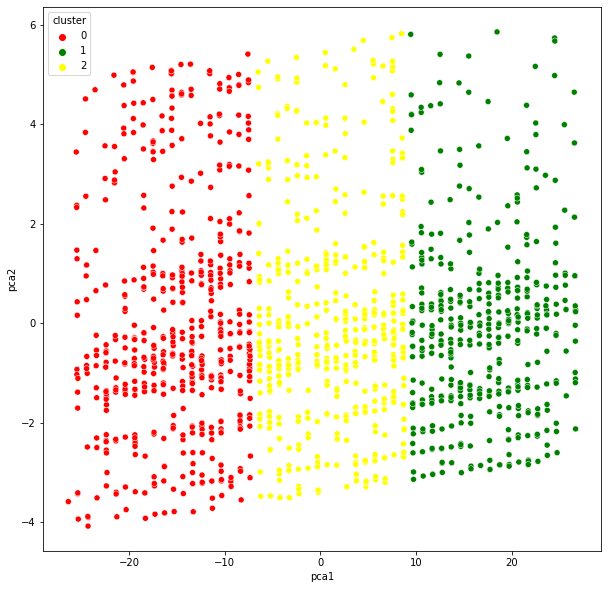

In [25]:
pca_df=pd.concat([pca_dataframe,pd.DataFrame({'cluster':label})],axis=1)
pca_df

#ploting the scatterplot for the pca_df data(3 different clusters)

plt.figure(figsize=(10,10))
pca_df_plot=sns.scatterplot(x='pca1',y='pca2',hue="cluster",data=pca_df,palette=['red','green','yellow'])
plt.show()

In [26]:
final_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,1,0,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,5,0,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,2,47,3,1,2
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,5,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,2,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,1,1,2


In [27]:
km = KMeans(n_clusters=5).fit(final_data)

cluster_map = pd.DataFrame()
cluster_map['final_data_index'] = final_data.index.values
cluster_map['cluster'] = km.labels_

#Once the final_dataFrame is available is quite easy to filter, For example, to filter all final_data points in cluster 3
cluster_map[cluster_map.cluster == 3]

,final_data_index,cluster
5,5,3
6,6,3
8,8,3
10,10,3
13,13,3
...,...,...
1431,1431,3
1440,1440,3
1444,1444,3
1446,1446,3


In [28]:
df['categories'] = kmeans.labels_

In [29]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,categories
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,1,0,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,5,0,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,2,47,3,1,2
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,5,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,2,0,1
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,1,1,2


In [30]:
segmenter_list_females = [len(df[(df['Gender']==0) & (df['categories']==0)]),len(df[(df['Gender']==0) & (df['categories']==1)]),len(df[(df['Gender']==0) & (df['categories']==2)])]
# segmenter_list_females
segmenter_list_males = [len(df[(df['Gender']==1) & (df['categories']==0)]),len(df[(df['Gender']==1) & (df['categories']==1)]),len(df[(df['Gender']==1) & (df['categories']==2)])]
# segmenter_list_males

# cluster values
# cluster_values = [490,547,416]
categories = ['c1','c2','c3']

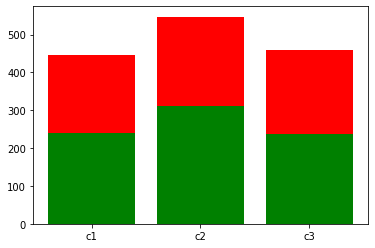

In [31]:
plt.bar(categories, segmenter_list_females, color='green')
plt.bar(categories, segmenter_list_males, bottom=segmenter_list_females, color='red')
plt.show()